### Project Overview: Customer Churn Prediction for SyriaTel

## 1. Business Understanding

SyriaTel, like many telecom providers, operates in a highly competitive industry where retaining existing customers is often more cost-effective than acquiring new ones. Customer churn — when subscribers stop using the service — directly impacts revenue and long-term profitability.

The challenge is that churn doesn't usually happen randomly. It can result from dissatisfaction with service quality, pricing, customer support, or competitors' offers. If SyriaTel can predict which customers are likely to churn, it can act proactively to retain them through targeted interventions.

### 2. Business Goal
To reduce customer churn and increase customer lifetime value (CLTV) by identifying subscribers who are most likely to leave soon.

Specifically:

i) Build a predictive model that flags high-risk customers.

ii) Enable SyriaTel's marketing, customer service, and retention teams to act early — through loyalty offers, personalized plans, or support outreach.

iii) Ultimately, minimize revenue loss and improve customer satisfaction.

## 3 Intended Audience

Telecom Business Executives: Need insights into churn trends, retention ROI, and how churn relates to product offerings.

Marketing & Customer Retention Teams: Need a list of high-risk customers for proactive targeting.

Customer Experience/Call Center Managers: Want to understand which service areas (e.g., frequent complaints, call duration) correlate with churn.

Data Science/Tech Team: Will implement the churn prediction system into the broader customer intelligence pipeline.

### 4. Success Metrics
Precision/Recall for Churned Class: Especially recall, to avoid missing actual churners.

Reduction in Monthly Churn Rate after targeted interventions.

Increase in retention ROI from personalized campaigns.

AUC-ROC score to measure model’s ability to distinguish churners from loyal customers.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,make_scorer,roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib



### Loading Dataset

In [5]:
# Load the dataset
df=pd.read_csv('bigml.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Data Exploration

After loading the dataset, the first step is to explore and understand its structure. This helps identify any data quality issues and guides the preprocessing steps. The .info() function is useful for checking the column names, data types, and whether there are any missing values in the dataset.

In [6]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the dataset, there is a total of 21 columns with 3,333 entries and no missing values. The .info() function confirms that all columns are fully populated. The dataset contains a mix of **categorical variables** e.g., state, international plan, voice mail plan, churn and **numerical variables** e.g., total day minutes, customer service calls, account length.

In [7]:
# Check for missing values,ljug;ytygyukl;'/
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

From the table above, we observe that there are no missing values in the dataset. This eliminates the need for extensive data cleaning steps such as imputation or row removal. Therefore, we proceed directly to data preprocessing, which involves preparing the dataset for modeling. This includes steps such as encoding categorical variables, dropping irrelevant columns, handling class imbalance, and scaling features where necessary to ensure optimal model performance.

### Dropping Columns
At this stage, columns that do not contribute to the predictive power of the model are dropped. These may include identifiers or any other fields that are either constant or irrelevant to the target variable. Keeping such columns can introduce noise, increase the risk of overfitting, and reduce the model's overall accuracy. By removing them, we ensure the model focuses on the most informative features.

In [8]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Now safely drop the columns
df.drop(columns=['phone number', 'area code', 'state'], inplace=True)

In [9]:
df_numerical=df[['total day minutes', 'total day calls', 'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls', 'customer service calls']]
df_numerical.describe()

,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856
std,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491
min,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000
25%,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000
50%,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000
75%,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000
max,350.800000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000


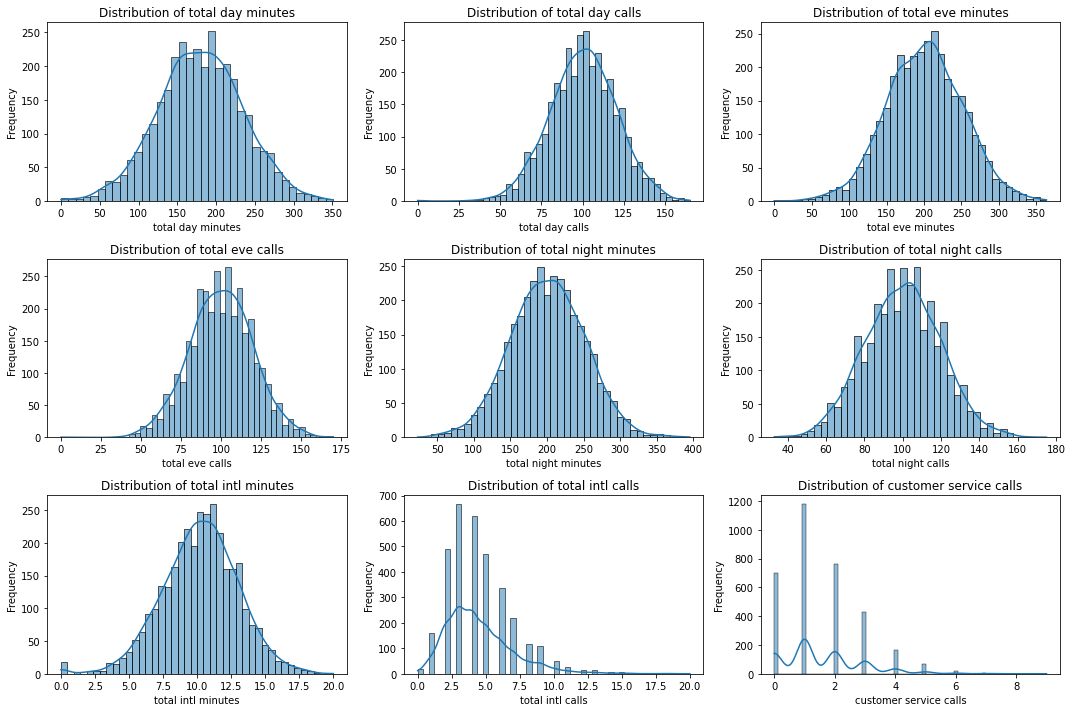

In [10]:
# Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_numerical.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_numerical[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
   
   

### Check and Handle Class Imbalance in the target class

Before training a model, it's important to check if the dataset is imbalanced — that is, whether one class dominates the other.A highly imbalanced dataset can cause the model to be biased toward the majority class, leading to poor performance on the minority class 

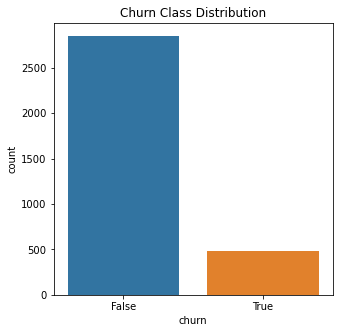

False    0.855086
True     0.144914
Name: churn, dtype: float64


In [11]:
# Check for class imbalance in the target variable 'churn'
# plotting the distribution of the target variable 'churn'
plt.figure(figsize=(5, 5))
sns.countplot(x='churn', data=df)
plt.title('Churn Class Distribution')
plt.show()

print(df['churn'].value_counts(normalize=True))

From the plot above, 85.5% of customers did not churn, while only 14.5% did churn. This indicates a class imbalance in the dataset, which may require special handling during model training to ensure the minority class (churners) is not overlooked.

### Encode Categorical Variables

To prepare the dataset for modeling, categorical variables need to be converted into numeric format.

a) Binary Categories
Columns: international plan, voice mail plan
Values: 'yes', 'no'

These binary categories can be easily encoded by mapping 'yes' to 1 and 'no' to 0.

In [12]:
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].astype(int)



In [13]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Performing one hot encoding on categorical columns

In [24]:
# one hot encoding for categorical variables
df_enconded = pd.get_dummies(df, columns=['international plan', 'voice mail plan'], drop_first=True)
df_enconded.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_1,voice mail plan_1
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0


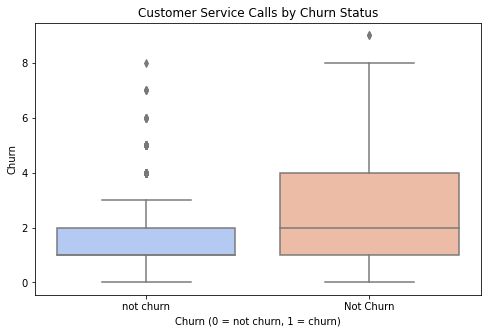

In [26]:
# Box plot of credit_score by loan_status
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_enconded, x='churn', y='customer service calls', palette='coolwarm')
plt.title('Customer Service Calls by Churn Status')
plt.xlabel('Churn (0 = not churn, 1 = churn)')
plt.ylabel('Churn')
plt.xticks(ticks=[0, 1], labels=['not churn', 'Not Churn'])
plt.show()

## Modelling

In [16]:
# Split the dataset into features and target variable
X = df_enconded.drop(columns=['churn'])
y= df_enconded['churn']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

In [17]:
y_test.value_counts(normalize=True)

0    0.857
1    0.143
Name: churn, dtype: float64

In [22]:
smote= SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Check the class distribution after resampling
print(y_train_resampled.value_counts(normalize=True))



0    0.5
1    0.5
Name: churn, dtype: float64


In [19]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
#logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
# Evaluate the model
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Logistic Regression - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

Logistic Regression - Accuracy: 0.86, Precision: 0.56, Recall: 0.22, F1 Score: 0.31


In [21]:
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined